<a href="https://colab.research.google.com/github/elishagretton/Modelling-Biological-Switches/blob/main/Model_(1)_Deterministic_model_using_ODEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up the Environment

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from scipy.integrate import odeint

# Define Hill function

In [ ]:
def f(X, theta, n):
  """
  Hill function.

  Params:
  X: list of floats, concentration of cell X
  theta: float, the value of X at which f(X) = 0.5
  n: int, sensitivity of production function.

  """
  return 1/(1+pow((X/theta),n))

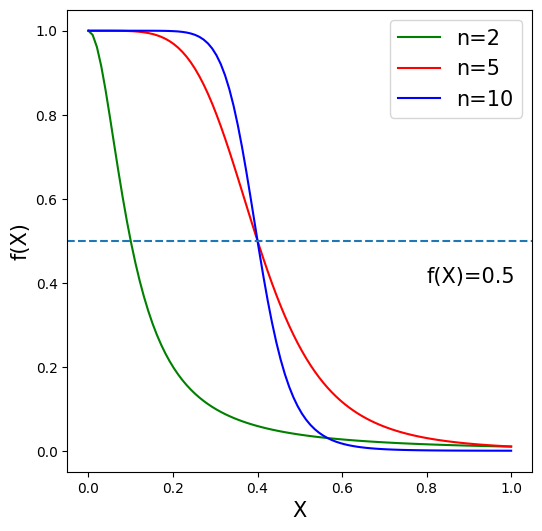

In [ ]:
# Hill function graph with varying n
x = np.linspace(0,1,100)
fig = plt.figure()
fig.set_size_inches(6,6)

# theta=0.1, n=2
for every_x in x:
  fx = f(x,theta=0.1,n=2)
plt.plot(x,fx, 'g', label='n=2')

# theta=0.4, n=5
for every_x in x:
  fx = f(x,theta=0.4,n=5)
plt.plot(x,fx, 'r',label='n=5')

# theta=0.4, n=10
for every_x in x:
  fx = f(x,theta=0.4,n=10)
plt.plot(x,fx, 'b',label='n=10')

plt.axhline(y=0.5,linestyle='--')
plt.annotate('f(X)=0.5', (0.8, 0.4),fontsize=15)

plt.xlabel("X", fontsize=15)
plt.ylabel("f(X)", fontsize=15)
plt.legend(loc=1,prop={"size":15},markerscale=2)
plt.show()

# Define deterministic model

In [ ]:
def dZ_dt(Z, ts, f, mu=1, theta=0.1, n=3):
  """
  Ordinary differential equation system for a biological switch.

  Params:
  Z: list of floats, initial condition for cell X and Y.
  ts: list of int, time taken.
  f: func, rate of production between cells.
  mu: float, positive decay constant to describe the rate of degradation of each cell.
  theta: float, the value of X at which f(X) = 0.5.
  n: int, sensitivity of production function.
  """
  X, Y = Z[0], Z[1]
  dxdt, dydt = -mu*X + f(Y,theta,n), -mu*Y + f(X,theta,n)
  return [dxdt, dydt]

# Example of a Biological Switch

Text(0, 0.5, 'Concentration')

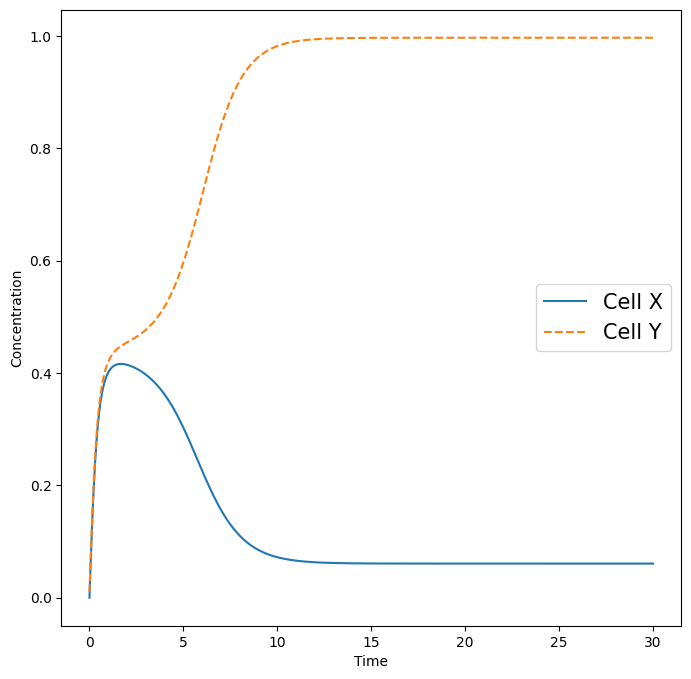

In [ ]:
fig = plt.figure()
fig.set_size_inches(8,8)

# Set initial conditions
ts = np.linspace(0, 30, 400)
Z0 = [0, 0.01]

# Run model
Zs = odeint(dZ_dt, Z0, ts, args=(f,1,0.4,3))

# Plot simulation
plt.plot(ts, Zs[:,0], label='Cell X')
plt.plot(ts, Zs[:,1], linestyle='--', label='Cell Y')

plt.legend(loc=7,prop={"size":15},markerscale=2)
plt.xlabel('Time')
plt.ylabel('Concentration')

The parameters chosen to represent the biological switch are μ = 1, θ = 0.4,
and n = 3.
* The degradation term is set to μ = 1, resulting in the variables X
and Y ranging between [0,1].
* The parameter, θ = 0.4, infers cell X reaches concentration 0.4 when
half of its opposing factor is produced. As the cells range in con-
centration from [0,1], θ = 0.4 is near the middle, therefore giving a
meaningful signal between cells.
* The parameter, n is chosen as n = 3. This is as n > 1 produces a
bistable system. We choose a slightly higher n at n = 3, to ensure
the interactions between both cells are not extremely sensitive.

A Time vs. Concentration graph is simulated of this biological system with
initial conditions X0 = 0, Y0 = 0.01.

The correct behaviour is simulated.

To begin, the concentration of both cells increase from time 0 to 1. At
t = 1, the behaviour of both cells change and the concentration of cell
Y starts to rise, while the concentration of cell X decreases. This keeps
occuring till both cells reach a constant concentration at around t = 12. This
implies the system has reached equilibrium. The figure shows the behaviour
of both cells switches at a point due to its initial conditions and parameters.
Consequently, we conclude the idealistic behaviour of a biological switch has
been accurately reflected with the full deterministic model.


# Investigating parameters

**The first parameter to be investigated is n. This describes the sensitivity of production between cells.**

<ipython-input-26-9a724c884c02>:40: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar=plt.colorbar(sm, ticks=np.linspace(0, 1, 4, endpoint=False) + 1/12,label='Parameter: n')


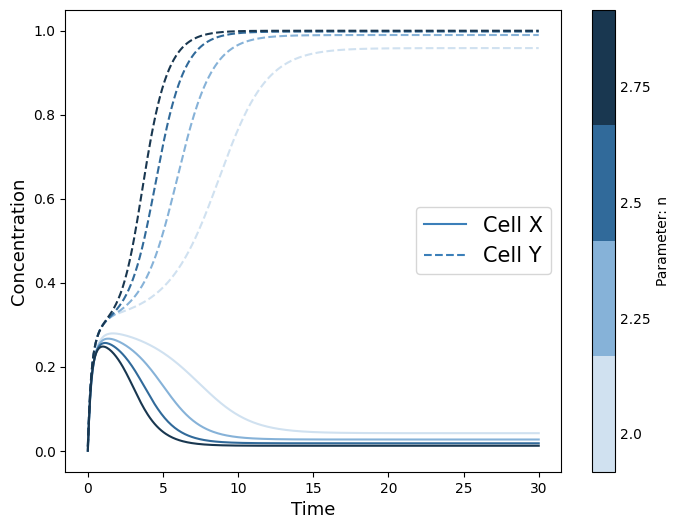

In [ ]:
# Set up of graph n = 4
n = 4
cmap = plt.get_cmap("Blues", n)
cmap = matplotlib.colors.ListedColormap(['#d0e1f0','#86b2d8','#316a9a','#193750'])
fig = plt.figure()
fig.set_size_inches(8,6)

# Set initial conditions
ts = np.linspace(0, 30, 400)
Z0 = [0, 0.01] # initial conditions for x and y

# Time graph n=2
Zs = odeint(dZ_dt, Z0, ts, args=(f,1,0.2,2))
plt.plot(ts, Zs[:,0], color=cmap(0))
plt.plot(ts, Zs[:,1], color=cmap(0),linestyle='--')

# Time graph n=3
Zs = odeint(dZ_dt, Z0, ts, args=(f,1,0.2,2.25))
plt.plot(ts, Zs[:,0], color=cmap(1))
plt.plot(ts, Zs[:,1], color=cmap(1),linestyle='--')

# Time graph n=4
Zs = odeint(dZ_dt, Z0, ts, args=(f,1,0.2,2.5))
plt.plot(ts, Zs[:,0], color=cmap(2))
plt.plot(ts, Zs[:,1], color=cmap(2),linestyle='--')

Zs = odeint(dZ_dt, Z0, ts, args=(f,1,0.2,2.75))
plt.plot(ts, Zs[:,0], color=cmap(3))
plt.plot(ts, Zs[:,1], color=cmap(3),linestyle='--')

plt.xlabel("Time", fontsize=13)
plt.ylabel("Concentration", fontsize=13)
line1 = Line2D(range(1), range(1), color='#3b7fb9')
line2 = Line2D(range(1), range(1), color='#3b7fb9',linestyle='--')
plt.legend((line1,line2),('Cell X','Cell Y'),numpoints=1, loc=7,prop={"size":15},markerscale=2)


sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar=plt.colorbar(sm, ticks=np.linspace(0, 1, 4, endpoint=False) + 1/12,label='Parameter: n')
cbar.ax.set_yticklabels(['2.0','2.25', '2.5', '2.75'])
cbar.ax.axes.tick_params(length=0)

plt.show()

**Trend:** As n increases, the switching time of the system decreases.

**Explanation:** We know that n represents the sensitivity of interactions between cells. Thus, increasing n causes the sensitivity of the production rate between cells to increase. This means the system is more sensitive to changes, which causes the system to makes its decision faster, and
therefore decreases switching time

**Now we will investigate the parameter θ.**

<ipython-input-27-fb7100126dfa>:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar=plt.colorbar(sm, ticks=np.linspace(0, 1, 3, endpoint=False) + 1/12,label='Parameter: '+ r'$\dot{\Theta}$')


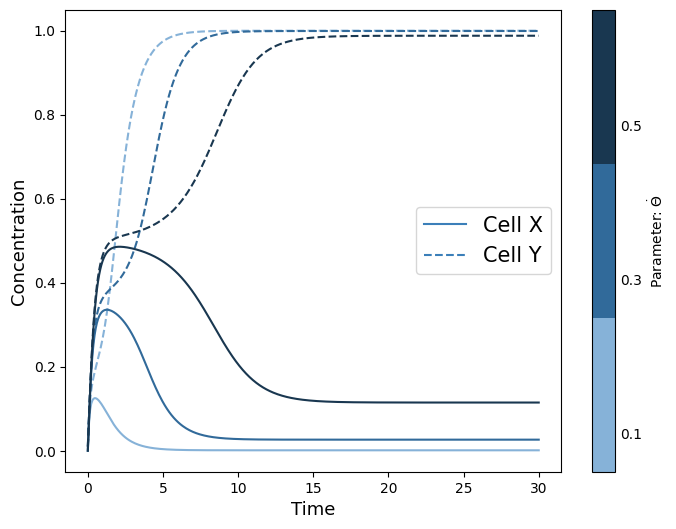

In [ ]:
# Set up of graph
n = 3
cmap = matplotlib.colors.ListedColormap(['#86b2d8','#316a9a','#193750'])
fig = plt.figure()
fig.set_size_inches(8,6)

# Set initial conditions
ts = np.linspace(0, 30, 400)
Z0 = [0, 0.01]

# Time graph theta=0.1
Zs = odeint(dZ_dt, Z0, ts, args=(f,1,0.1,3))
plt.plot(ts, Zs[:,0], color=cmap(0))
plt.plot(ts, Zs[:,1], color=cmap(0),linestyle='--')

# Time graph theta=0.3
Zs = odeint(dZ_dt, Z0, ts, args=(f,1,0.3,3))
plt.plot(ts, Zs[:,0], color=cmap(1))
plt.plot(ts, Zs[:,1], color=cmap(1),linestyle='--')

# Time graph theta=0.5
Zs = odeint(dZ_dt, Z0, ts, args=(f,1,0.5,3))
plt.plot(ts, Zs[:,0], color=cmap(2))
plt.plot(ts, Zs[:,1], color=cmap(2),linestyle='--')

plt.xlabel("Time", fontsize=13)
plt.ylabel("Concentration", fontsize=13)
line1 = Line2D(range(1), range(1), color='#3b7fb9')
line2 = Line2D(range(1), range(1), color='#3b7fb9',linestyle='--')
plt.legend((line1,line2),('Cell X','Cell Y'),numpoints=1, loc=7,prop={"size":15},markerscale=2)

sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar=plt.colorbar(sm, ticks=np.linspace(0, 1, 3, endpoint=False) + 1/12,label='Parameter: '+ r'$\dot{\Theta}$')
cbar.ax.set_yticklabels(['0.1','0.3', '0.5'])
cbar.ax.axes.tick_params(length=0)

plt.show()

**Trend:** A θ increases, the switching time of the switch increases.

**Explanation:** We know θ describes the concentration of one cell at
which the concentration of the other degrades by half. Therefore, larger θ means the degrading cell halves its concentration at a larger concentration of the other cell. Thus, a larger concentration occurs at a later time, which explains why switching time increases with θ.

**Summary of results:**

From changing the parameters, two interesting results are discovered:
* As the sensitivity of interactions between cells increase, the decision-
making speed of the system increases. This is because both of the
cells influence one another more.
* A larger θ means the rate of degradation of one cell is slower (it takes
longer for the cell to decay to half its concentration). Consequently,
a slower degradation rate causes the system to act slower, and make
slower decisions.

These results allow the parameters for the deterministic model to be chosen
with consideration when creating a mathematical model. For instance, a
small n and high θ may be chosen for a biological switch reflecting a system
with a slow decision making speed.